In [1]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np


device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')



In [31]:


# (Batch, Channels, Height, Width) = (1, 3, 4, 4)
x = torch.arange(1, 49).reshape(1, 3, 4, 4)

print(f"🔷 원래 입력 텐서 (shape: 1x3x4x4):{x}\n")
for i in range(3):
    print(f"Channel {i}:\n{x[0, i]}\n")
    

# Flatten: (1, 3, 4, 4) → (1, 3*4*4 = 48)
flattened = torch.flatten(x, start_dim=1)
print("🔶 Flatten 결과 (shape: 1x48):\n")
print(flattened)


🔷 원래 입력 텐서 (shape: 1x3x4x4):tensor([[[[ 1,  2,  3,  4],
          [ 5,  6,  7,  8],
          [ 9, 10, 11, 12],
          [13, 14, 15, 16]],

         [[17, 18, 19, 20],
          [21, 22, 23, 24],
          [25, 26, 27, 28],
          [29, 30, 31, 32]],

         [[33, 34, 35, 36],
          [37, 38, 39, 40],
          [41, 42, 43, 44],
          [45, 46, 47, 48]]]])

Channel 0:
tensor([[ 1,  2,  3,  4],
        [ 5,  6,  7,  8],
        [ 9, 10, 11, 12],
        [13, 14, 15, 16]])

Channel 1:
tensor([[17, 18, 19, 20],
        [21, 22, 23, 24],
        [25, 26, 27, 28],
        [29, 30, 31, 32]])

Channel 2:
tensor([[33, 34, 35, 36],
        [37, 38, 39, 40],
        [41, 42, 43, 44],
        [45, 46, 47, 48]])

🔶 Flatten 결과 (shape: 1x48):

tensor([[ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
         19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36,
         37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48]])


In [42]:
x = [
  [ [ [1, 2, 3],
      [4, 5, 6],
      [7, 8, 9] ],[ [1, 2, 3],
      [4, 5, 6],
      [7, 8, 9] ] ],       # 첫 번째 이미지 (배치 0)

  [ [ [10,11,12],
      [13,14,15],
      [16,17,18] ] ]       # 두 번째 이미지 (배치 1)
]
x[0] # 배치
x[0][1] # 채널



[[1, 2, 3], [4, 5, 6], [7, 8, 9]]

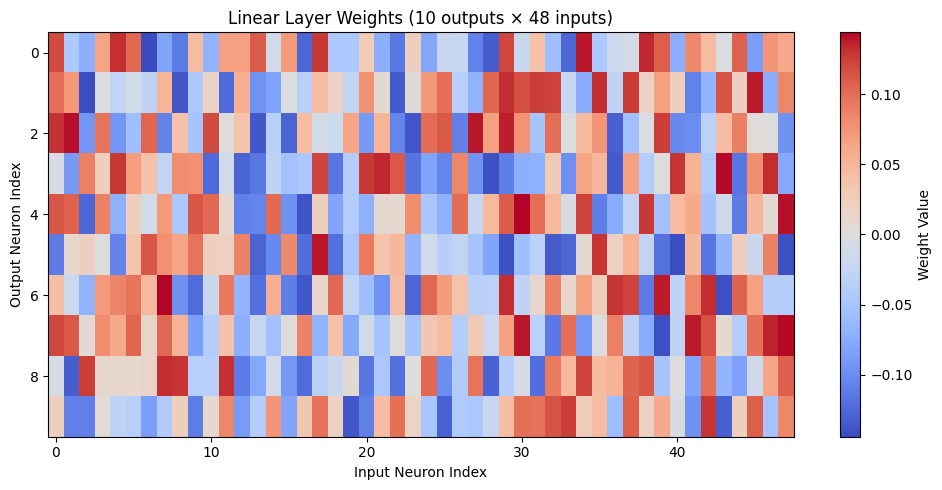

In [43]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

# Define a linear layer
linear = nn.Linear(48, 10)

# Extract weights
weights = linear.weight.detach().numpy()  # shape (10, 48)

# Plot weight matrix
plt.figure(figsize=(10, 5))
plt.imshow(weights, cmap='coolwarm', aspect='auto')
plt.colorbar(label='Weight Value')
plt.title("Linear Layer Weights (10 outputs × 48 inputs)")
plt.xlabel("Input Neuron Index")
plt.ylabel("Output Neuron Index")
plt.tight_layout()
plt.show()


In [3]:
train_size = int(len(dataset) * 0.8)
test_size = int(len(dataset) - train_size)

train_dataset,test_dataset = torch.utils.data.random_split(dataset,[train_size,test_size])

In [4]:
train_loader = DataLoader(train_dataset,batch_size=32,shuffle=True)
test_loader = DataLoader(test_dataset,batch_size=32,shuffle=False)

In [5]:
train_dataset[0][0].shape

torch.Size([3, 128, 128])

In [6]:
import torch.nn as nn

class SatelliteNet(nn.Module):
    def __init__(self):
        super().__init__()

        self.features = nn.Sequential(
            nn.Conv2d(3, 16, kernel_size=3, padding=1),     # 128x128 → (16x128x128)
            nn.BatchNorm2d(16),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),                             # → 16x64x64

            nn.Conv2d(16, 32, kernel_size=3, padding=1),    # → 32x64x64
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),                             # → 32x32x32

            nn.Conv2d(32, 64, kernel_size=3, padding=1),    # → 64x32x32
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),                             # → 64x16x16
        )

        self.classifier = nn.Sequential(
            nn.Flatten(),                                   # → 64×16×16 = 16384
            nn.Linear(64 * 16 * 16, 256),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(256, 84),
            nn.ReLU(),
            nn.Linear(84, 4)                                # 4 classes
        )

    def forward(self, x):
        x = self.features(x)
        x = self.classifier(x)
        return x


In [7]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model = SatelliteNet().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 0.001)

In [ ]:
num_epochs = 30
patience = 10
best_acc = 0 
counter = 0 
for epoch in range(num_epochs + 1):
    model.train()
    
    for data, target in train_loader:
        data, target = data.to(device), target.to(device)
        
        output = model(data) #학습
        optimizer.zero_grad() # 기울기 초기화
        loss = criterion(output, target)
        loss.backward() # 기울기 계산
        optimizer.step() # 모델의 가중치 bias 업데이트
    
    model.eval()
    test_correct = 0
    test_total = 0
    with torch.no_grad():
        for test_data, test_target in test_loader:
            test_data, test_target = test_data.to(device), test_target.to(device)
            test_output = model(test_data)
            pred_target = torch.argmax(test_output, axis = 1)
            test_correct += (pred_target == test_target).sum().item()
            test_total += test_target.size(0)
    acc = test_correct / test_total
    print(f'{epoch:4d}/{num_epochs} Epoch | Test Accuracy : {acc * 100:.2f}%')        
    
        # 베스트 모델 저장 & 조기 종료
    if acc > best_acc:
        best_acc = acc
        torch.save(model.state_dict(), 'best_model.pt')
    else:
        counter += 1
    
    if counter >= patience:
        print('조기 종료')
        break

   0/30 Epoch | Test Accuracy : 85.71%
   1/30 Epoch | Test Accuracy : 86.87%
   2/30 Epoch | Test Accuracy : 72.76%
   3/30 Epoch | Test Accuracy : 89.09%
   4/30 Epoch | Test Accuracy : 85.27%
   5/30 Epoch | Test Accuracy : 87.93%
   6/30 Epoch | Test Accuracy : 89.71%
   7/30 Epoch | Test Accuracy : 87.22%
   8/30 Epoch | Test Accuracy : 80.30%
   9/30 Epoch | Test Accuracy : 71.52%
  10/30 Epoch | Test Accuracy : 91.13%
  11/30 Epoch | Test Accuracy : 89.00%
  12/30 Epoch | Test Accuracy : 88.73%
  13/30 Epoch | Test Accuracy : 92.37%
  14/30 Epoch | Test Accuracy : 77.28%
  15/30 Epoch | Test Accuracy : 95.47%
  16/30 Epoch | Test Accuracy : 96.27%
  17/30 Epoch | Test Accuracy : 92.01%
조기 종료
